## APPLIED ARTIFICIAL INTELLLIGENCE

## NAME: OLAMIDE BANKOLE

## STUDENT ID: 202428313

## Importing the libraries needed for this task

In [6]:
!pip install seaborn --upgrade

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
 
import re
import string
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report

import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\920031\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [192]:
# Load the training dataset from CSV
# Use efficient data types to reduce memory usage:
# - 'id' as int16 (small integers)
# - 'target' as int8 (0 or 1 classification)
train_df = pd.read_csv('nlp-getting-started/train.csv', dtype={'id': np.int16, 'target': np.int8})

# Load the test dataset from CSV
# - 'id' is also loaded as int16 for consistency and memory optimization
test_df = pd.read_csv('nlp-getting-started/test.csv', dtype={'id': np.int16})

# Print the shape (rows, columns) of the training set
print('Training Set Shape = {}'.format(train_df.shape))

# Calculate and print the memory usage of the training set in MB
print('Training Set Memory Usage = {:.2f} MB'.format(train_df.memory_usage().sum() / 1024**2))

# Print the shape of the test set
print('Test Set Shape = {}'.format(test_df.shape))

# Calculate and print the memory usage of the test set in MB
print('Test Set Memory Usage = {:.2f} MB'.format(test_df.memory_usage().sum() / 1024**2))


Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.20 MB
Test Set Shape = (3263, 4)
Test Set Memory Usage = 0.08 MB


In [193]:
#displaying the data in the tes dataframe 
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [194]:
#print description of train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int16 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int8  
dtypes: int16(1), int8(1), object(3)
memory usage: 200.9+ KB


In [195]:
#displaying the data in the test dataframe 
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [196]:
#print description of test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int16 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int16(1), object(3)
memory usage: 83.0+ KB


## Data Exploration and Cleaning

In [197]:
# Check for null values in the training dataset
print("Null values in training set:")
print(train_df.isnull().sum())

# Check for null values in the test dataset
print("\nNull values in test set:")
print(test_df.isnull().sum())

Null values in training set:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Null values in test set:
id             0
keyword       26
location    1105
text           0
dtype: int64


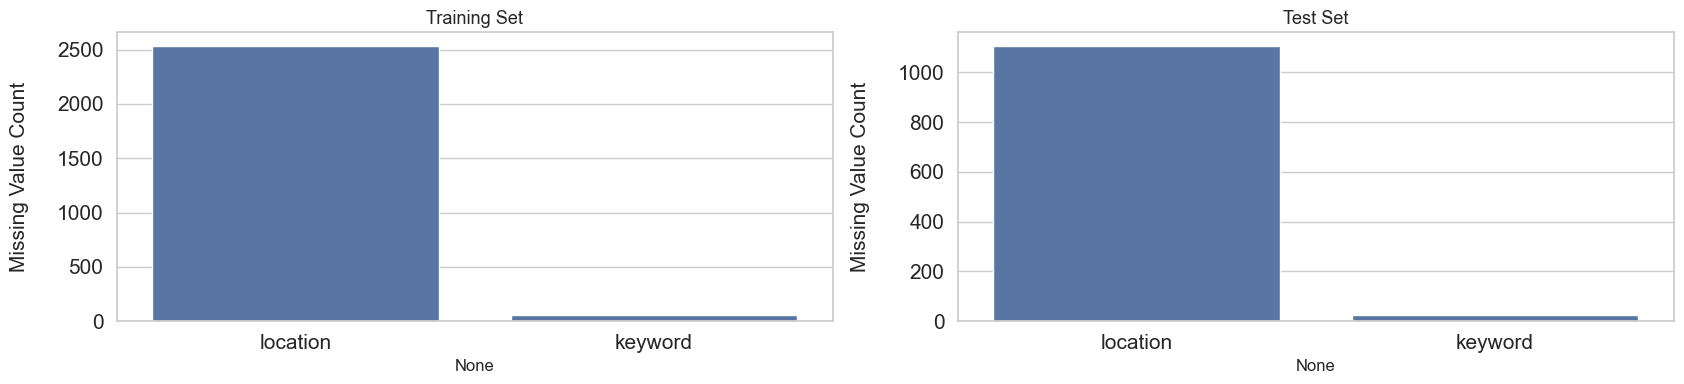

In [198]:
# List of columns to check for missing values
missing_cols = ['location', 'keyword']

# Create subplots
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

# Loop over the DataFrames (train and test) and plot missing value counts for the specified columns
for i, df in enumerate([train_df, test_df]):
    sns.barplot(x=df[missing_cols].isnull().sum().index, 
                y=df[missing_cols].isnull().sum().values, 
                ax=axes[i])
    axes[i].set_title('Training Set' if i == 0 else 'Test Set', fontsize=13)
    axes[i].set_ylabel('Missing Value Count', size=15, labelpad=20)
    axes[i].tick_params(axis='x', labelsize=15)
    axes[i].tick_params(axis='y', labelsize=15)

# Save the plot before showing
plt.tight_layout()
plt.savefig("missing_values_plot.png", bbox_inches='tight') 
plt.show()

## Analyzing the Distribution of Target Values Across Keywords

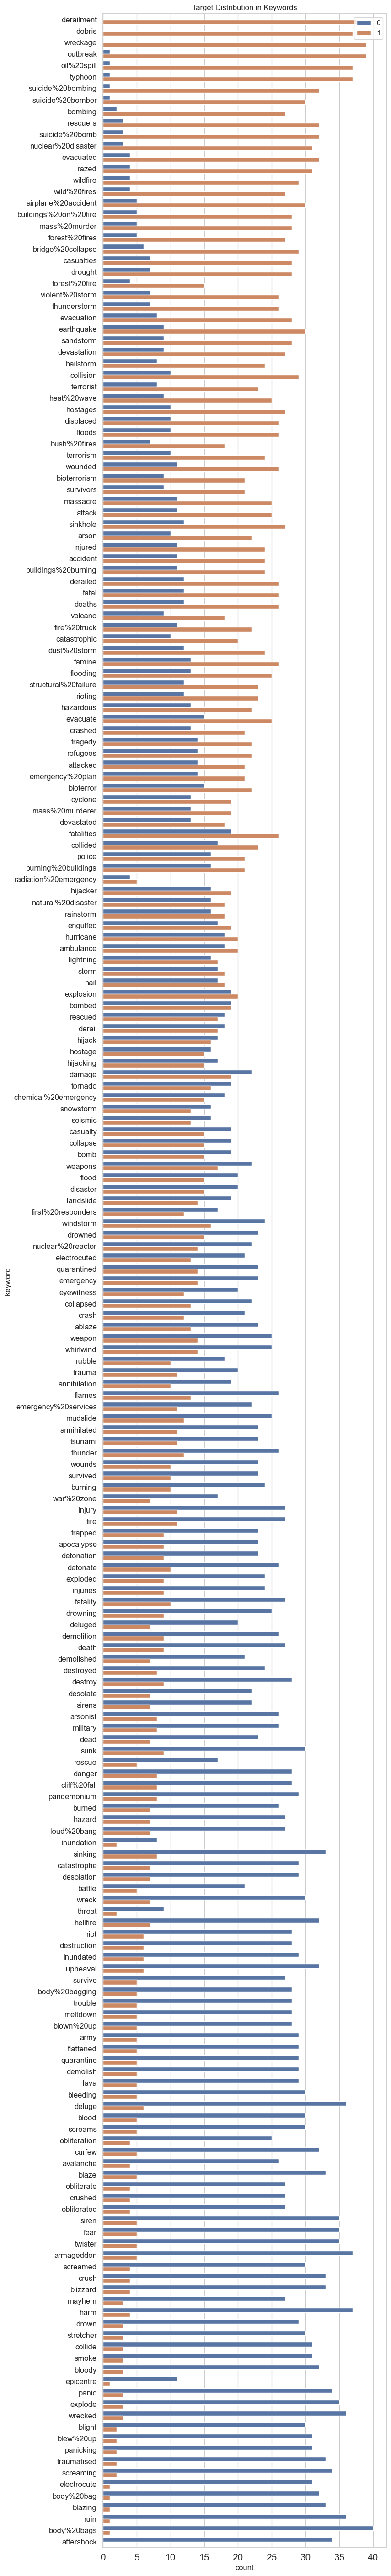

In [199]:
train_df['target_mean'] = train_df.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=train_df.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=train_df.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')
plt.savefig("Target Distribution in Keywords.png", bbox_inches='tight') 
plt.show()

train_df.drop(columns=['target_mean'], inplace=True)

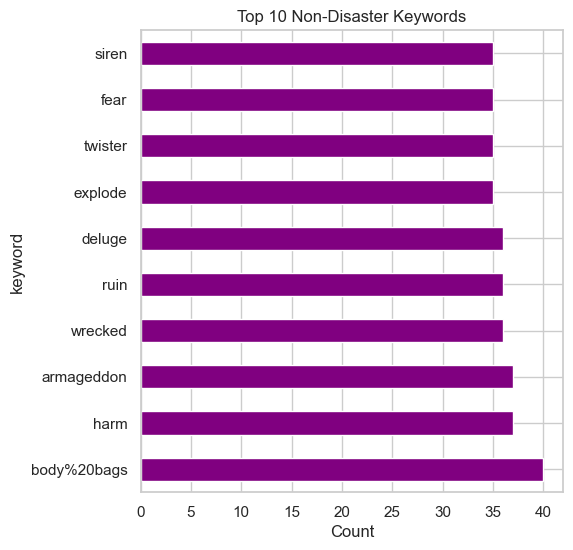

In [200]:
# Most Common Keywords in Disaster and Non-Disaster Tweets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
disaster_keywords = train_df[train_df['target'] == 0]['keyword'].value_counts().head(10)
disaster_keywords.plot(kind='barh', color='purple')
plt.xlabel('Count')
plt.title('Top 10 Non-Disaster Keywords')
plt.savefig("Top 10 Non-Disaster Keywords.png", bbox_inches='tight') 

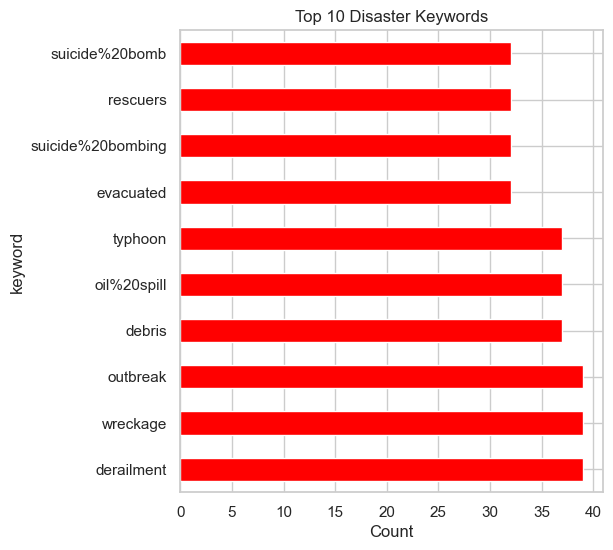

In [201]:
# Most Common Keywords in Disaster and Non-Disaster Tweets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
disaster_keywords = train_df[train_df['target'] == 1]['keyword'].value_counts().head(10)
disaster_keywords.plot(kind='barh', color='red')
plt.xlabel('Count')
plt.title('Top 10 Disaster Keywords')
plt.savefig("Top 10 Disaster Keywords.png", bbox_inches='tight') 

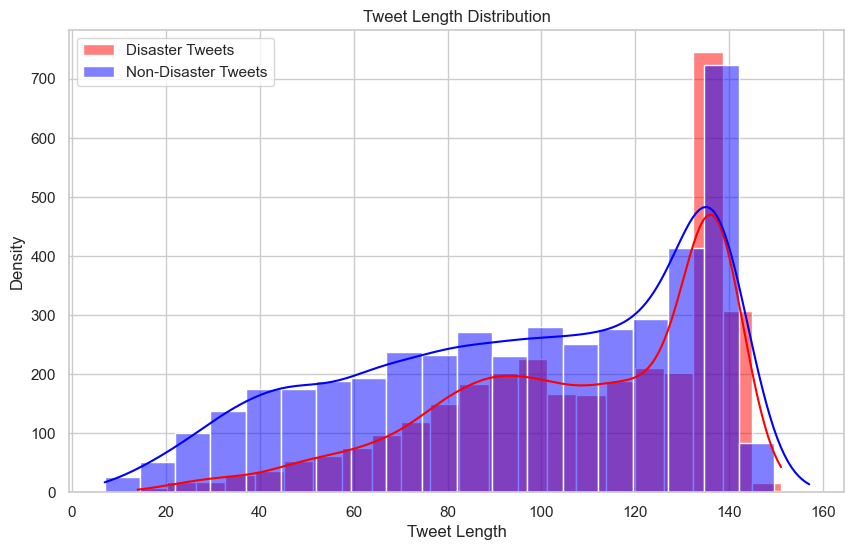

In [202]:
# Tweet Length Distribution
train_df['tweet_length'] = train_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_df[train_df['target'] == 1]['tweet_length'], color='red', label='Disaster Tweets', kde=True)
sns.histplot(train_df[train_df['target'] == 0]['tweet_length'], color='blue', label='Non-Disaster Tweets', kde=True)
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.title('Tweet Length Distribution')
plt.legend()
plt.savefig("Tweet Length Distribution.png", bbox_inches='tight') 
plt.show()

## Visualizing the distribution of Target Counts

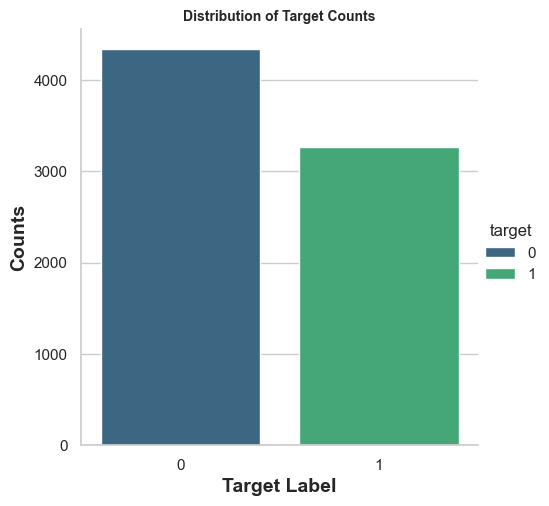

In [203]:
# Count the number of positive and negative tweets with different colors
sns.set(style="whitegrid", color_codes=True)

# Create a count plot of the target variable with different colors
sns.catplot(x="target", data=train_df, kind="count", hue="target", height=5, palette="viridis")

# Customize plot labels and title
plt.title("Distribution of Target Counts", size=10, weight="bold")
plt.xlabel("Target Label", size=14, weight="bold")
plt.ylabel("Counts", size=14, weight="bold")

plt.savefig("Distribution of Target Counts.png", bbox_inches='tight') 
# Show the plot
plt.show()

## Displaying the words with WordCloud

Train Data: 7613
Test Data: 3263
Non-Disastrous Tweets: 4342
Disastrous Tweets: 3271


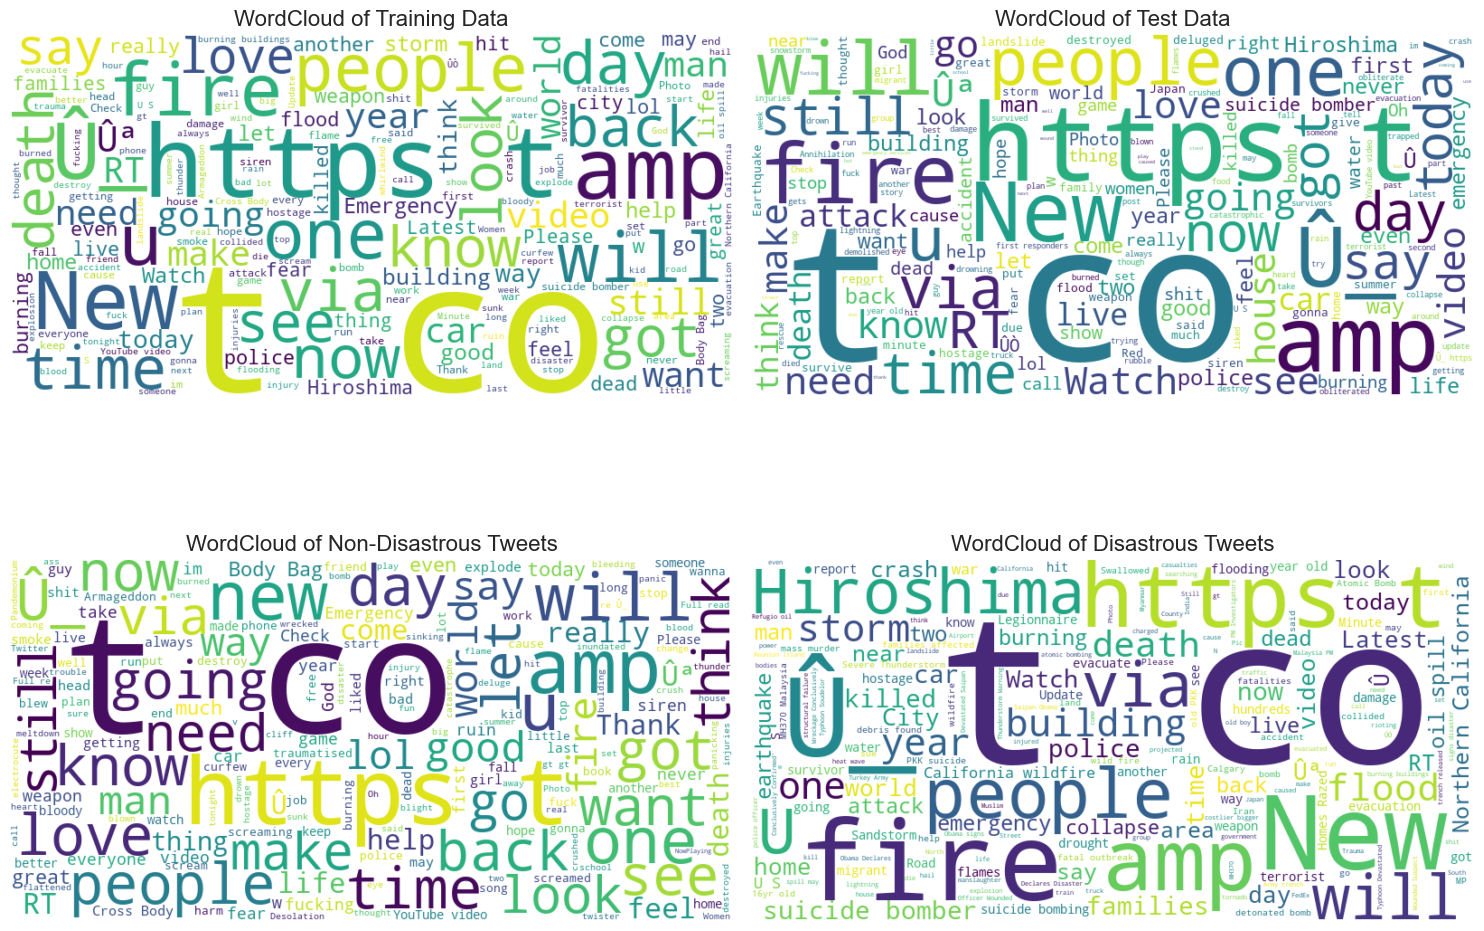

In [204]:
def generate_wordclouds(train_df, test_df, target_column='target', text_column='text'):
    # Check the size of the datasets
    print("Train Data:", len(train_df))
    print("Test Data:", len(test_df))

    # Generate WordCloud for Training Data
    text_train = " ".join(review for review in train_df[text_column])
    wordcloud_train = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text_train)

    # Generate WordCloud for Test Data
    text_test = " ".join(review for review in test_df[text_column])
    wordcloud_test = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text_test)

    # Filter Non-Disastrous Tweets (assuming target 0 for non-disastrous)
    non_disastrous_tweets = train_df[train_df[target_column] == 0]
    print("Non-Disastrous Tweets:", len(non_disastrous_tweets))
    text_non_disastrous = " ".join(review for review in non_disastrous_tweets[text_column])
    wordcloud_non_disastrous = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text_non_disastrous)

    # Filter Disastrous Tweets (assuming target 1 for disastrous)
    disastrous_tweets = train_df[train_df[target_column] == 1]
    print("Disastrous Tweets:", len(disastrous_tweets))
    text_disastrous = " ".join(review for review in disastrous_tweets[text_column])
    wordcloud_disastrous = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text_disastrous)

    # Plot all WordClouds
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot for Training Data
    axs[0, 0].imshow(wordcloud_train, interpolation='bilinear')
    axs[0, 0].axis('off')
    axs[0, 0].set_title("WordCloud of Training Data", fontsize=16)

    # Plot for Test Data
    axs[0, 1].imshow(wordcloud_test, interpolation='bilinear')
    axs[0, 1].axis('off')
    axs[0, 1].set_title("WordCloud of Test Data", fontsize=16)

    # Plot for Non-Disastrous Tweets
    axs[1, 0].imshow(wordcloud_non_disastrous, interpolation='bilinear')
    axs[1, 0].axis('off')
    axs[1, 0].set_title("WordCloud of Non-Disastrous Tweets", fontsize=16)

    # Plot for Disastrous Tweets
    axs[1, 1].imshow(wordcloud_disastrous, interpolation='bilinear')
    axs[1, 1].axis('off')
    axs[1, 1].set_title("WordCloud of Disastrous Tweets", fontsize=16)

    # Show the plots
    plt.tight_layout()
    plt.show()

# Call the function with your train and test data
generate_wordclouds(train_df, test_df)

In [205]:
# The 'text' column contains the raw text for training, and the 'target' column contains the corresponding labels

# Extracting the 'text' column to use as input features (X_train)
# This will be the text data that we will process for model training
X_train = train_df['text']

# Extracting the 'target' column to use as output labels (y_train)
# This will be the labels associated with the corresponding text for training the model
y_train = train_df['target']

## Defining Helper Functions for Text Cleaning

In [206]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove emojis
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'
        u'\U0001F300-\U0001F5FF'
        u'\U0001F680-\U0001F6FF'
        u'\U0001F1E0-\U0001F1FF'
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove HTML
    text = re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation.replace("#", "")))  # preserve hashtags first

    # Lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\w*\d\w*', '', text)

    # Remove just the hashtag symbol, not the word
    text = re.sub(r'#', '', text)

    return text


train_df['text'] = train_df['text'].apply(clean_text)
test_df['text'] = test_df['text'].apply(clean_text)

print(train_df)
print(test_df)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  tweet_length  
0     our deeds are the reason of this earthquake ma...       1            69  
1                 forest fire near la ronge sask canada       1            38  
2     all residents asked to shelter in place are be...       1           133  
3      people receive wildfires evacuation orders in...       1            65  
4     just got sent this photo from ruby alaska as s...       1            88  
...                                                 ...     ...           ...  
7608  two giant cranes holding a bridge collapse int...

In [207]:
# Select the 'target' column from the training data and assign it to Y_train (this is the target/label for training)
Y_train = train_df.filter(['target'], axis = 1)

# Select the 'text' column from the training data and assign it to X_train (this is the feature/input for training)
X_train = train_df.filter(['text'], axis=1)

# Print the first 5 rows of the X_train dataframe to inspect the 'text' data
print(X_train.head())
print()

# Select the 'text' column from the test data and assign it to X_test (this is the feature/input for testing)
X_test = test_df.filter(['text'], axis=1)

# Print the first 5 rows of the X_test dataframe to inspect the 'text' data in the test set
print(X_test.head())

                                                text
0  our deeds are the reason of this earthquake ma...
1              forest fire near la ronge sask canada
2  all residents asked to shelter in place are be...
3   people receive wildfires evacuation orders in...
4  just got sent this photo from ruby alaska as s...

                                                text
0                 just happened a terrible car crash
1  heard about earthquake is different cities sta...
2  there is a forest fire at spot pond geese are ...
3              apocalypse lighting spokane wildfires
4        typhoon soudelor kills  in china and taiwan


## Text Preprocessing

### Tokenization 

In [208]:
# Download necessary NLTK resources
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\920031\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [209]:
# Ensure that you are extracting the 'text' column as a Series
X_train_text = X_train['text']  
X_test_text = X_test['text']    

# Verify that these are Series
print(type(X_train_text))  
print(type(X_test_text))   

# Apply the function to tokenize text
X_train_tokenized = X_train_text.apply(word_tokenize)
X_test_tokenized = X_test_text.apply(word_tokenize)

# View the tokenized text (first few entries)
print("Tokenized training data:")
print(X_train_tokenized.head())

print("\nTokenized test data:")
print(X_test_tokenized.head())

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
Tokenized training data:
0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

Tokenized test data:
0            [just, happened, a, terrible, car, crash]
1    [heard, about, earthquake, is, different, citi...
2    [there, is, a, forest, fire, at, spot, pond, g...
3           [apocalypse, lighting, spokane, wildfires]
4    [typhoon, soudelor, kills, in, china, and, tai...
Name: text, dtype: object


### Stop Words Removal

In [210]:
# Load the stopwords only once and convert to a set for faster lookup
stop_words = set(stopwords.words('english'))

# Define the function to remove stopwords from tokenized words
def remove_stopwords(tokens):
    
    # Filter out the stopwords from the tokenized text
    filtered_words = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_words)  # Join the words back into a sentence 

# Apply the stopword removal function to the tokenized Series
X_train_no_stopwords = X_train_tokenized.apply(remove_stopwords)
X_test_no_stopwords = X_test_tokenized.apply(remove_stopwords)

# View the processed texts (first few entries after stopword removal)
print("Processed training data (no stopwords):")
print(X_train_no_stopwords.head())  # Print first 5 rows of processed training data

print("\nProcessed test data (no stopwords):")
print(X_test_no_stopwords.head())  # Print first 5 rows of processed test data

Processed training data (no stopwords):
0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

Processed test data (no stopwords):
0                          happened terrible car crash
1    heard earthquake different cities stay safe ev...
2    forest fire spot pond geese fleeing across str...
3                apocalypse lighting spokane wildfires
4                  typhoon soudelor kills china taiwan
Name: text, dtype: object


### Lemmatization

In [211]:
# Download necessary NLTK datasets
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\920031\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\920031\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\920031\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [212]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get part of speech for lemmatization
def get_wordnet_pos(word):
    """
    Map POS tag to first character lemmatize() accepts (WordNet).
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV,
        'J': wordnet.ADJ
    }
    return tag_dict.get(tag, wordnet.NOUN)

# Function to lemmatize the text and keep the tokens as a list
def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

# Apply the lemmatization function to the tokenized text
X_train_lemmatized = X_train_tokenized.apply(lemmatize_text)
X_test_lemmatized = X_test_tokenized.apply(lemmatize_text)

y_train = train_df['target']

# View the lemmatized text (first few entries)
print("Lemmatized training data:")
print(X_train_lemmatized.head())

print("\nLemmatized test data:")
print(X_test_lemmatized.head())

Lemmatized training data:
0    [our, deed, be, the, reason, of, this, earthqu...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, resident, ask, to, shelter, in, place, b...
3    [people, receive, wildfire, evacuation, order,...
4    [just, get, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

Lemmatized test data:
0              [just, happen, a, terrible, car, crash]
1    [heard, about, earthquake, be, different, city...
2    [there, be, a, forest, fire, at, spot, pond, g...
3               [apocalypse, light, spokane, wildfire]
4    [typhoon, soudelor, kill, in, china, and, taiwan]
Name: text, dtype: object


## Vectorization

In [213]:
# Initialize the TfidfVectorizer with desired parameters
vectorizer = TfidfVectorizer(max_features=2000, max_df=0.90)
 
# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train['text'])
 
# Transform the test data using the fitted vectorizer
X_test_tfidf = vectorizer.transform(X_test['text'])
 
# Display the vocabulary size
vocabulary_size = len(vectorizer.vocabulary_)
print(f"Vocabulary size: {vocabulary_size}")
 
# Display the shape of the transformed training data
print(f"Shape of transformed training data: {X_train_tfidf.shape}")
X_test_tfidf.shape

Vocabulary size: 2000
Shape of transformed training data: (7613, 2000)


(3263, 2000)

In [214]:
# Check the matrix shape: (number of documents, number of unique terms)
print(f"Matrix shape: {X_train_tfidf.shape}")  # Number of documents and features (terms)

# Check the number of non-zero elements in the matrix
print(f"Number of non-zero elements: {X_train_tfidf.nnz}")  # nnz: number of non-zero elements

# Calculate the density of the matrix (proportion of non-zero elements)
density = X_train_tfidf.nnz / float(X_train_tfidf.shape[0] * X_train_tfidf.shape[1])
print(f"Density: {density:.4f}")  # A low density value indicates sparsity

# Check if the data is sparse (density < 0.1 indicates sparse data)
if density < 0.1:
    print("The data is sparse.")
else:
    print("The data is not sparse.")

Matrix shape: (7613, 2000)
Number of non-zero elements: 71696
Density: 0.0047
The data is sparse.


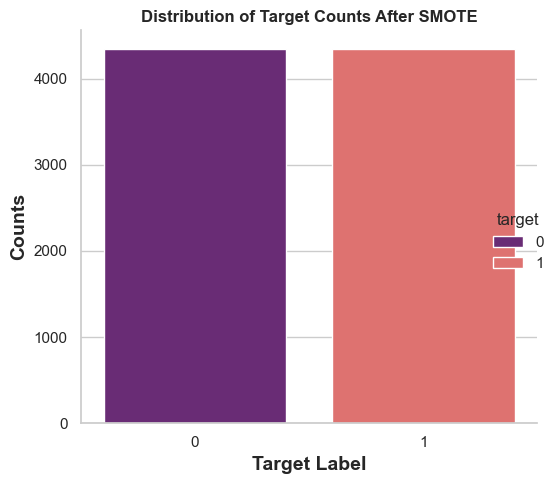

In [215]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, Y_train)

# Convert resampled labels to a flat array (if it's a DataFrame)
if isinstance(y_resampled, pd.DataFrame):
    y_resampled = y_resampled.values.ravel()

# Convert to DataFrame for plotting
resampled_df = pd.DataFrame({'target': y_resampled})

# Plot the balanced class distribution
sns.set(style="whitegrid", color_codes=True)
sns.catplot(x="target", data=resampled_df, kind="count", hue="target", height=5, palette="magma")

# Customize plot labels and title
plt.title("Distribution of Target Counts After SMOTE", size=12, weight="bold")
plt.xlabel("Target Label", size=14, weight="bold")
plt.ylabel("Counts", size=14, weight="bold")

# Adjust layout to avoid cutting off title or labels
plt.tight_layout()

# Save the plot
plt.savefig("smote_class_distribution.png", format="png", dpi=300)

# Display the plot
plt.show()

## Splitting (Traditional Machine Learning Models)

In [216]:
# Define the features and target variable
features = X_resampled
target = y_resampled
 
# Split the data into training and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(
    features, target, 
    test_size=0.2, 
    random_state=123, 
    stratify=target
)

## Scaling

In [217]:
# Define the StandardScaler
scaler = StandardScaler(with_mean=False)

# Fit the scaler on the training data
scaler.fit(x_train)

# Transform the datasets
X_train_scaled = scaler.transform(x_train)
X_val_scaled = scaler.transform(x_val)
X_test_scaled = scaler.transform(X_test_tfidf)

## Logistic Regression Model

In [80]:
# Define Logistic Regression and parameter grid
log_reg = LogisticRegression(random_state=42,  max_iter=1000)
param_grid = {
    'C': [0.1, 0.5, 1],
    'fit_intercept': [True, False]
}

# GridSearchCV with multiple scoring metrics
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5,
    scoring=["f1_macro", "precision_macro", "recall_macro", "accuracy"],
    refit="f1_macro",
    verbose=1
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Output best parameters and score
print(f"Best parameters for logistic regression: {grid_search.best_params_}")
print(f"Best F1 Macro Score from GridSearchCV: {grid_search.best_score_:.2f}\n")

# Predict on training and validation sets
y_train_pred = grid_search.predict(X_train_scaled)
y_val_pred = grid_search.predict(X_val_scaled)

# Classification Reports
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for logistic regression: {'C': 0.1, 'fit_intercept': True}
Best F1 Macro Score from GridSearchCV: 0.76

Training Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3473
           1       0.94      0.92      0.93      3474

    accuracy                           0.93      6947
   macro avg       0.93      0.93      0.93      6947
weighted avg       0.93      0.93      0.93      6947


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       869
           1       0.77      0.79      0.78       868

    accuracy                           0.78      1737
   macro avg       0.78      0.78      0.78      1737
weighted avg       0.78      0.78      0.78      1737



In [82]:
def plot_confusion_matrix(y_true, y_pred, title, cmap="Blues", save_path=None, show=True):
    """
    Plots and optionally saves a confusion matrix with a color bar.

    Parameters:
    - y_true: Ground truth labels
    - y_pred: Predicted labels
    - title: Title for the plot
    - cmap: Color map for the heatmap
    - save_path: If provided, saves the plot to this file path
    - show: Whether to display the plot (default is True)
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=True)  # <== changed cbar to True
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()

    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path)

    if show:
        plt.show()
    else:
        plt.close()

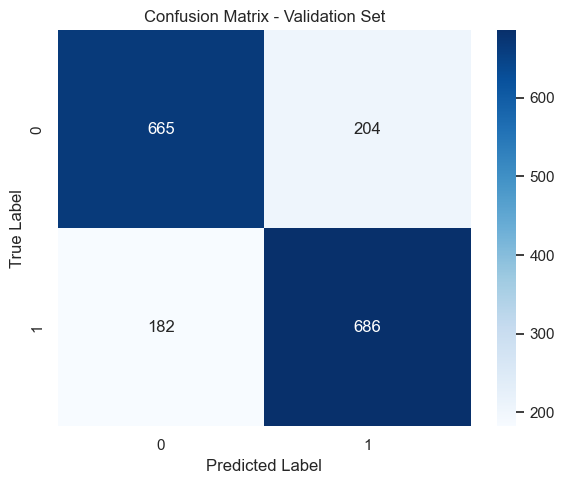

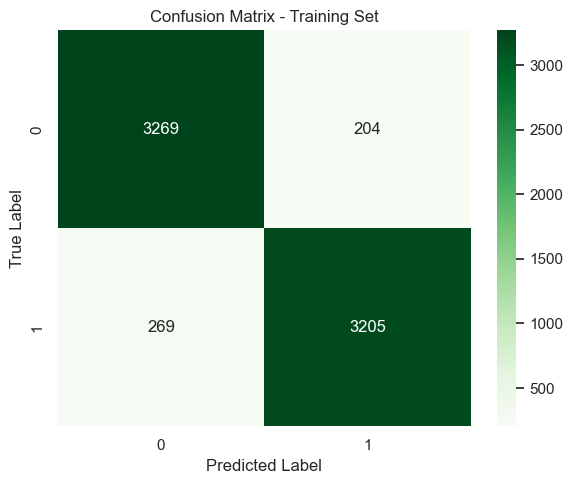

In [83]:
# Plot and save the confusion matrix for the validation set
plot_confusion_matrix( y_val,y_val_pred, title="Confusion Matrix - Validation Set", cmap="Blues",save_path="plots/confusion_matrix_val.png")

# Plot and save the confusion matrix for the training set
plot_confusion_matrix(y_train,y_train_pred,title="Confusion Matrix - Training Set",cmap="Greens",save_path="plots/confusion_matrix_train.png")

- From the results above the logistic regression model acheived F1 score of  0.94(94%) on the training data and 0.92(92%) on the validation data for class 0 (Not Disaster),0.78(78%) on the training data and 0.71(71%) on the validation data for class 1(Real Disaster) is struggling to generalize
- Hyperparameter Tuning will be deployed to tackle this and improve generalization 

## Hyperparameter Tuning

## Logistic Regression Model 2 - Adding more parameters to check if there will be any improvement

In [84]:
# Define the Logistic Regression classifier
log_reg = LogisticRegression(random_state=123)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 0.5, 1, 10],
    'penalty': ['l1', 'l2'],  
    'fit_intercept': [True, False],
    'solver': ['liblinear', 'saga'],  # saga can handle l1 and l2
    'max_iter': [100, 200, 300],      # Number of iterations for convergence
    'tol': [1e-4, 1e-3, 1e-2],        # Tolerance for stopping criteria
}

# Create the GridSearchCV object with multiple metrics
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, n_jobs=-1, cv=5, 
                           scoring=["f1_macro", "precision_macro", "recall_macro", "accuracy"], 
                           refit="f1_macro")  # Refit based on F1 macro score

# Fit the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)  # No need for .values.ravel() here as y_train is already a numpy.ndarray

# Display the best parameters and model performance on training and validation sets
print(f"Best parameters for logistic regression: {grid_search.best_params_}\n")

# Evaluate on the training set
y_train_pred = grid_search.predict(X_train_scaled)

# Predict on the validation set
y_val_pred = grid_search.predict(X_val_scaled)

# Generate classification reports for training and validation sets
train_classification_report = classification_report(y_train, y_train_pred, output_dict=True)
val_classification_report = classification_report(y_val, y_val_pred, output_dict=True)

# Print the reports
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

Best parameters for logistic regression: {'C': 0.1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3473
           1       0.92      0.89      0.90      3474

    accuracy                           0.91      6947
   macro avg       0.91      0.91      0.91      6947
weighted avg       0.91      0.91      0.91      6947


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       869
           1       0.81      0.79      0.80       868

    accuracy                           0.80      1737
   macro avg       0.80      0.80      0.80      1737
weighted avg       0.80      0.80      0.80      1737



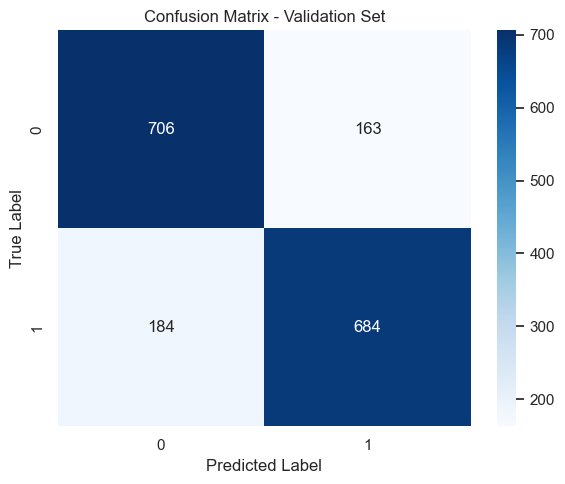

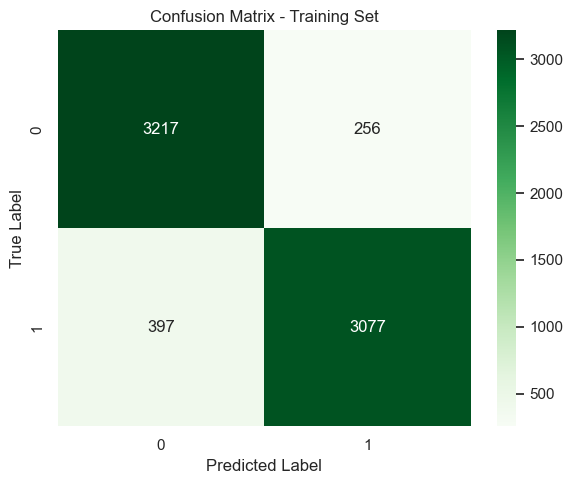

In [85]:
# Plot and save the confusion matrix for the validation set
plot_confusion_matrix( y_val,y_val_pred, title="Confusion Matrix - Validation Set", cmap="Blues",save_path="plots/confusion_matrix_val.png")

# Plot and save the confusion matrix for the training set
plot_confusion_matrix(y_train,y_train_pred,title="Confusion Matrix - Training Set",cmap="Greens",save_path="plots/confusion_matrix_train.png")

- The results here seemed to have improved a bit 
- Result 3 seems to be the best overall model. While it doesn't have the highest recall for class 1 in the validation set, it strikes a good balance between precision and recall for both classes, and its weighted average F1-score is also the highest.

- Result 1 has high recall for class 1, but its lower accuracy and F1-score across both classes indicate it's overfitting a bit (focusing too much on the majority class).

- Result 2 is similar to Result 3, but the slightly higher penalty (l1) and lower tolerance parameters in Result 3 likely lead to better generalization on the validation set.

## Random Forest Model

In [218]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with a fixed random seed for reproducibility
random_forest_model = RandomForestClassifier(random_state=0)

# Train the model on the training set
random_forest_model.fit(x_train, y_train)

# Predict class labels on the validation set
y_val_predictions = random_forest_model.predict(x_val)

# Calculate accuracy and F1 score (multiplied by 100 for percentage representation)
val_accuracy = accuracy_score(y_val, y_val_predictions) * 100
val_f1_score = f1_score(y_val, y_val_predictions) * 100

# Print evaluation results
print("Random Forest Accuracy: {:.2f}%".format(val_accuracy))
print("Random Forest F1 Score: {:.2f}%".format(val_f1_score))

# Print detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_val, y_val_predictions))

Random Forest Accuracy: 80.77%
Random Forest F1 Score: 79.63%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       869
           1       0.85      0.75      0.80       868

    accuracy                           0.81      1737
   macro avg       0.81      0.81      0.81      1737
weighted avg       0.81      0.81      0.81      1737



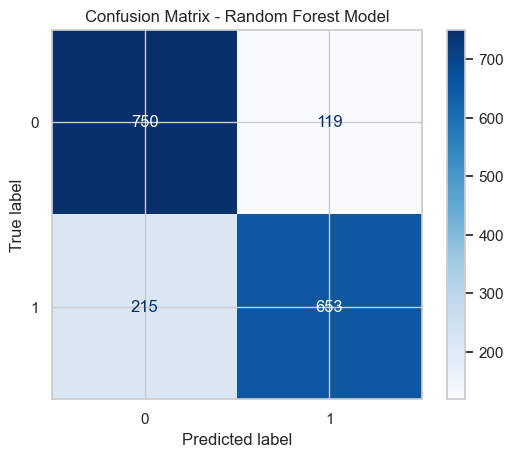

In [220]:
# Create the confusion matrix
cm = confusion_matrix(y_val, y_val_predictions)

# Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest Model")
plt.show()


In [224]:
# Make predictions on the test set
test_predictions = random_forest_model.predict(X_test_tfidf)

# Display the first 10 test examples and predictions
for i in range(10):
    print("Example {}:".format(i + 1))
    print("Text: {}".format(X_test['text'].iloc[i]))
    print("Predicted Label: {}".format(test_predictions[i]))
    print("-" * 50)

Example 1:
Text: just happened a terrible car crash
Predicted Label: 1
--------------------------------------------------
Example 2:
Text: heard about earthquake is different cities stay safe everyone
Predicted Label: 1
--------------------------------------------------
Example 3:
Text: there is a forest fire at spot pond geese are fleeing across the street i cannot save them all
Predicted Label: 1
--------------------------------------------------
Example 4:
Text: apocalypse lighting spokane wildfires
Predicted Label: 0
--------------------------------------------------
Example 5:
Text: typhoon soudelor kills  in china and taiwan
Predicted Label: 1
--------------------------------------------------
Example 6:
Text: were shakingits an earthquake
Predicted Label: 1
--------------------------------------------------
Example 7:
Text: theyd probably still show more life than arsenal did yesterday eh eh
Predicted Label: 0
--------------------------------------------------
Example 8:
Text: h

## Hyperparameter Tuning using GridSearch

In [225]:
# Define the hyperparameter grid for tuning the Random Forest model
param_grid = {
    'n_estimators': [100, 200],             # Number of trees in the forest
    'max_depth': [None, 10, 20],            # Maximum depth of the trees; None means nodes are expanded until all leaves are pure
    'min_samples_split': [2, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],       # Number of features to consider when looking for the best split
    'class_weight': [None, 'balanced']      # Handle class imbalance; 'balanced' adjusts weights inversely proportional to class frequencies
}

# Initialize GridSearchCV for Random Forest with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),  # Random Forest model with a fixed random seed
    param_grid=param_grid,                             # Hyperparameter grid to search
    cv=5,                                               # 5-fold cross-validation
    scoring='f1',                                       # Evaluation metric: F1 score (binary classification assumed)
    n_jobs=-1,                                          # Use all available CPU cores for parallel processing
    verbose=1                                           # Print progress messages while fitting
)

# Fit GridSearchCV on the training data to find the best hyperparameter combination
grid_search.fit(x_train, y_train)

# Retrieve the best estimator from the grid search
best_rf = grid_search.best_estimator_

# Print the best parameters found during the search
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'class_weight': None, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [226]:
best_rf = grid_search.best_estimator_

# Predict on validation/test data
y_pred_val = best_rf.predict(x_val)

# Re-evaluate
accuracy = accuracy_score(y_val, y_pred_val) * 100
f1 = f1_score(y_val, y_pred_val) * 100

print("Tuned Random Forest Accuracy: {:.2f}%".format(accuracy))
print("Tuned Random Forest F1 Score: {:.2f}%".format(f1))
print("\nClassification Report:")
print(classification_report(y_val, y_pred_val))

Tuned Random Forest Accuracy: 81.92%
Tuned Random Forest F1 Score: 80.62%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       869
           1       0.87      0.75      0.81       868

    accuracy                           0.82      1737
   macro avg       0.83      0.82      0.82      1737
weighted avg       0.83      0.82      0.82      1737



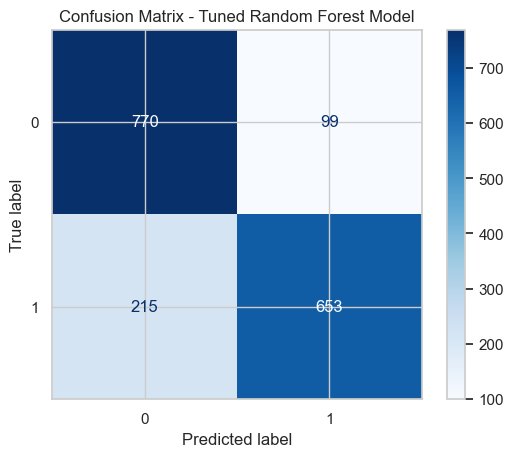

In [227]:
# Predict on the validation set
y_pred_val = best_rf.predict(x_val)

# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred_val)

# Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Tuned Random Forest Model")
plt.show()

In [228]:
# Make predictions on the test set
test_predictions = random_forest_model.predict(X_test_tfidf)

# Display the first 10 test examples and predictions
for i in range(10):
    print("Example {}:".format(i + 1))
    print("Text: {}".format(X_test['text'].iloc[i]))
    print("Predicted Label: {}".format(test_predictions[i]))
    print("-" * 50)

Example 1:
Text: just happened a terrible car crash
Predicted Label: 1
--------------------------------------------------
Example 2:
Text: heard about earthquake is different cities stay safe everyone
Predicted Label: 1
--------------------------------------------------
Example 3:
Text: there is a forest fire at spot pond geese are fleeing across the street i cannot save them all
Predicted Label: 1
--------------------------------------------------
Example 4:
Text: apocalypse lighting spokane wildfires
Predicted Label: 0
--------------------------------------------------
Example 5:
Text: typhoon soudelor kills  in china and taiwan
Predicted Label: 1
--------------------------------------------------
Example 6:
Text: were shakingits an earthquake
Predicted Label: 1
--------------------------------------------------
Example 7:
Text: theyd probably still show more life than arsenal did yesterday eh eh
Predicted Label: 0
--------------------------------------------------
Example 8:
Text: h

## Splitting, Padding (Deep Learning Models)

In [30]:
# Define raw text and labels
X = train_df['text']
y = train_df['target']

# Split raw text into train/validation sets for deep learning
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Initialize and fit tokenizer
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])

# Inspect max length
print("Max sequence length in training data:", max(len(seq) for seq in X_train_seq))

# Set max length for padding
maxlen = 100

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_val_pad = pad_sequences(X_val_seq, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

#  Print shapes for sanity check
print('X_train shape:', X_train_pad.shape)
print('X_val shape:', X_val_pad.shape)
print('X_test shape:', X_test_pad.shape)

Max sequence length in training data: 31
X_train shape: (6090, 100)
X_val shape: (1523, 100)
X_test shape: (3263, 100)


## Embedding Matrix – GloVe

In [31]:
# Initialize the tokenizer
tokenizer_1 = Tokenizer()

# Fit the tokenizer on your training text data
tokenizer_1.fit_on_texts(X_train)

# Vocabulary size (add 1 because index 0 is reserved for padding)
vocab_size = len(tokenizer_1.word_index) + 1
print(f'Vocabulary Size: {vocab_size}')

# Load GloVe embeddings
embeddings_index = {}
# Open the GloVe file in the current working directory
with open('glove.twitter.27B/glove.twitter.27B.200d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Print how many word vectors were loaded
print(f'Loaded {len(embeddings_index)} word vectors.')

Vocabulary Size: 14557
Loaded 1193514 word vectors.


In [32]:
embedding_dim = 200  # Set this based on your GloVe file (glove.twitter.27B.200d.txt)

# create a weight matrix for words in training set
embedding_matrix = np.zeros((vocab_size, 200))

for word, i in tokenizer_1.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
print('Embedding Matrix Shape:', embedding_matrix.shape)

Embedding Matrix Shape: (14557, 200)


## BiLSTM- MODEL 1 

In [93]:
# Define the model
model = Sequential()

# Add embedding layer (pretrained GloVe vectors, not trainable)
embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    input_length=maxlen,
    trainable=False
)
model.add(embedding_layer)

# Set the pretrained weights
embedding_layer.build((None,))
embedding_layer.set_weights([embedding_matrix])

# Add BiLSTM and output layer
model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(1, activation='sigmoid'))

# Build and show summary
model.build(input_shape=(None, maxlen))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 100, 200)            │       2,911,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 256)                 │         336,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,248,553 (12.39 MB)

 Trainable params: 337,153 (1.29 MB)

 Non-trainable params: 2,911,400 (11.11 MB)

In [94]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001

# Define the Adam optimizer with the custom learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compiling the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
from sklearn.utils import class_weight
from keras.callbacks import EarlyStopping

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history= model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=64,
    class_weight=class_weights,
    callbacks=[early_stopping]
)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 166ms/step - accuracy: 0.5618 - loss: 0.6715 - val_accuracy: 0.6848 - val_loss: 0.6035
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.6730 - loss: 0.6065 - val_accuracy: 0.6894 - val_loss: 0.5793
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.7033 - loss: 0.5667 - val_accuracy: 0.7262 - val_loss: 0.5500
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.7350 - loss: 0.5437 - val_accuracy: 0.7374 - val_loss: 0.5419
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.7379 - loss: 0.5354 - val_accuracy: 0.7039 - val_loss: 0.5471
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - accuracy: 0.7586 - loss: 0.5077 - val_accuracy: 0.7282 - val_loss: 0.5335
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.7666 - loss: 0.4907 - val_accuracy: 0.7452 - val_loss: 0.5138
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.7803 - loss: 0.4723 - val_accu

In [96]:
# Evaluating the model
y_pred = model.predict(X_val_pad)  # use padded validation set
y_pred = (y_pred > 0.5).astype(int)

f1 = f1_score(y_val, y_pred)
print("F1 Score on Validation Data: {:.2f}".format(f1))

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step
F1 Score on Validation Data: 0.71


In [97]:
predictions = model.predict(X_test_pad)  

# Get binary predictions
predictions = (predictions > 0.5).astype(int).reshape(-1)

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


In [98]:
# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       869
           1       0.73      0.69      0.71       654

    accuracy                           0.76      1523
   macro avg       0.75      0.75      0.75      1523
weighted avg       0.76      0.76      0.76      1523



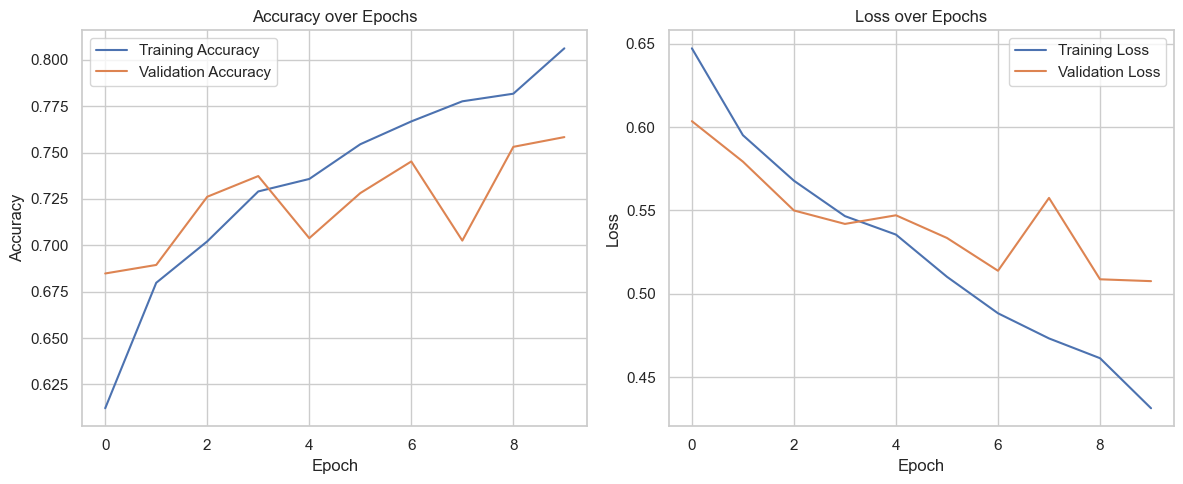

In [99]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# --- Plot Accuracy ---
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# --- Plot Loss ---
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<Figure size 2000x3000 with 0 Axes>

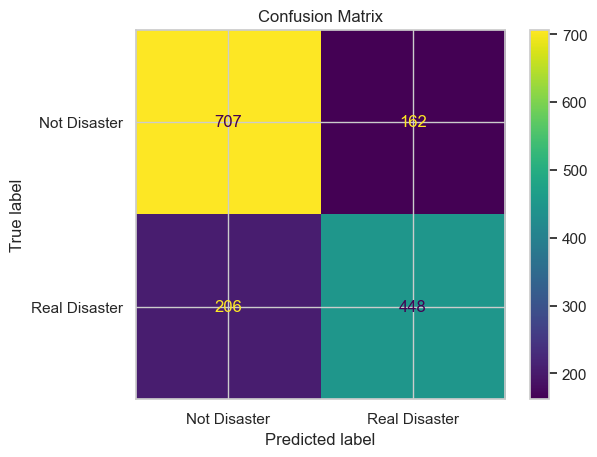

In [100]:
# Define class names
class_names = ['Not Disaster', 'Real Disaster']

plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val,y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

In [101]:
# Display some examples
for i in range(10):
    print("Example {}:".format(i + 1))
    print("Text: {}".format(test_df['text'][i]))
    print("Predicted Label: {}".format(predictions[i]))
    print("-" * 50)

Example 1:
Text: just happened a terrible car crash
Predicted Label: 1
--------------------------------------------------
Example 2:
Text: heard about earthquake is different cities stay safe everyone
Predicted Label: 0
--------------------------------------------------
Example 3:
Text: there is a forest fire at spot pond geese are fleeing across the street i cannot save them all
Predicted Label: 1
--------------------------------------------------
Example 4:
Text: apocalypse lighting spokane wildfires
Predicted Label: 0
--------------------------------------------------
Example 5:
Text: typhoon soudelor kills  in china and taiwan
Predicted Label: 1
--------------------------------------------------
Example 6:
Text: were shakingits an earthquake
Predicted Label: 0
--------------------------------------------------
Example 7:
Text: theyd probably still show more life than arsenal did yesterday eh eh
Predicted Label: 1
--------------------------------------------------
Example 8:
Text: h

## Hyper Parameter Tuning

##  BiLSTM MODEL 2 - Adding attention layer with dropout of 0.3, 20 epochs

In [118]:
import tensorflow as tf
from keras.layers import Layer

class attention(Layer):
    def __init__(self, **kwargs):
        super(attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self, x):
        # Use tf.linalg.matmul() for matrix multiplication
        et = tf.squeeze(tf.tanh(tf.linalg.matmul(x, self.W) + self.b), axis=-1)
        
        # Use tf.keras.activations.softmax() instead of K.softmax()
        at = tf.keras.activations.softmax(et)
        at = tf.expand_dims(at, axis=-1)
        output = x * at
        return tf.reduce_sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

    def get_config(self):
        return super(attention, self).get_config()

In [122]:
# Model definition
model = Sequential()

# Add embedding layer (Assuming you have embedding_matrix and vocab_size, embedding_dim set up)
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen, trainable=False)
model.add(embedding_layer)

# Add BiLSTM Layer
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))

# Add Attention Layer
model.add(attention())

# Add Dropout Layer
model.add(Dropout(0.3))

# Add Dense Layer for Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.build(input_shape=(None, maxlen))

learning_rate = 0.001

# Define the Adam optimizer with the custom learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compiling the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ (None, 100, 200)            │       2,911,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_18 (Bidirectional)     │ (None, 100, 256)            │         336,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_3 (attention)              │ (None, 256)                 │             356 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,248,909 (12.39 MB)

 Trainable params: 337,509 (1.29 MB)

 Non-trainable params: 2,911,400 (11.11 MB)

In [125]:
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=64, validation_data=(X_val_pad, y_val))

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.6662 - loss: 0.6148 - val_accuracy: 0.6802 - val_loss: 0.5943
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - accuracy: 0.6837 - loss: 0.5967 - val_accuracy: 0.6875 - val_loss: 0.5925
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 192ms/step - accuracy: 0.6847 - loss: 0.5966 - val_accuracy: 0.6894 - val_loss: 0.5866
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - accuracy: 0.7101 - loss: 0.5772 - val_accuracy: 0.6993 - val_loss: 0.5821
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step - accuracy: 0.6925 - loss: 0.5845 - val_accuracy: 0.6947 - val_loss: 0.5861
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 188ms/step - accuracy: 0.6991 - loss: 0.5776 - val_accuracy: 0.7045 - val_loss: 0.5756
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.7105 - loss: 0.5744 - val_accuracy: 0.6986 - val_loss: 0.5792
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 182ms/step - accuracy: 0.7126 - loss: 0.5736 - val_accu

In [126]:
# Evaluating the model
y_pred = model.predict(X_val_pad)  # use padded validation set
y_pred = (y_pred > 0.5).astype(int)

f1 = f1_score(y_val, y_pred)
print("F1 Score on Validation Data: {:.2f}".format(f1))

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
F1 Score on Validation Data: 0.65


In [127]:
predictions = model.predict(X_test_pad)  

# Get binary predictions
predictions = (predictions > 0.5).astype(int).reshape(-1)

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step


In [128]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       869
           1       0.67      0.63      0.65       654

    accuracy                           0.71      1523
   macro avg       0.70      0.70      0.70      1523
weighted avg       0.71      0.71      0.71      1523



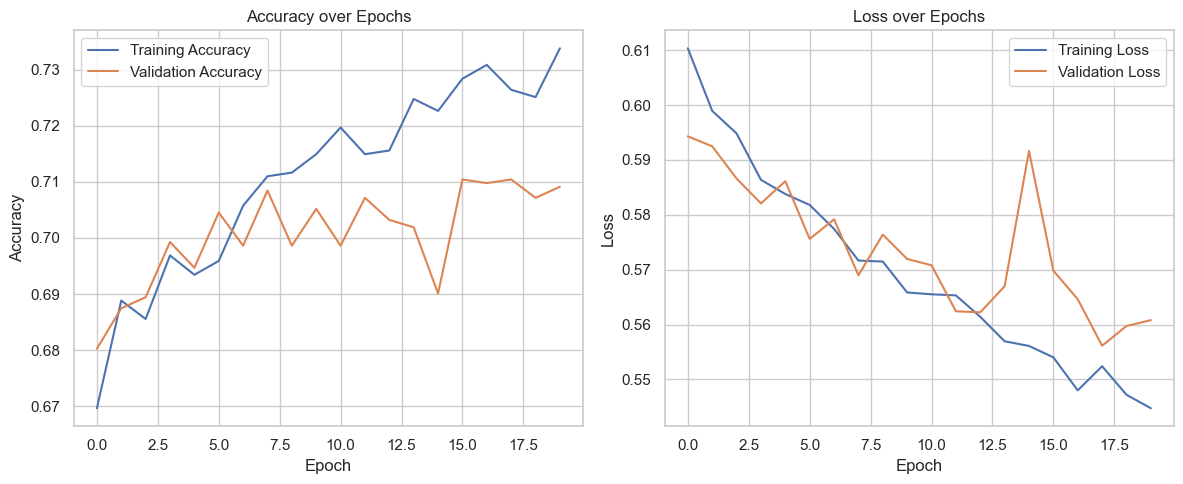

In [130]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# --- Plot Accuracy ---
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# --- Plot Loss ---
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<Figure size 2000x3000 with 0 Axes>

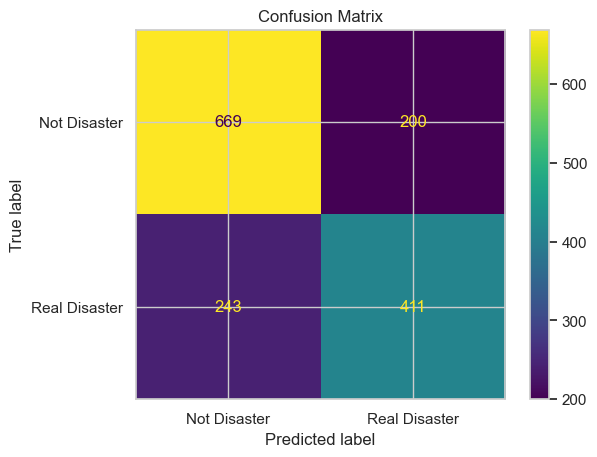

In [131]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val,y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

## BiLSTM MODEL 3 - Adding multiple BiLSTM layers

In [179]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Embedding layer (pretrained GloVe vectors, not trainable)
embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    input_length=maxlen,
    trainable=False
)
model.add(embedding_layer)

# Conv1D + MaxPooling1D for feature extraction
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# First Bidirectional LSTM layer
model.add(Bidirectional(LSTM(
    units=128,
    dropout=0.3,
    recurrent_dropout=0.3,
    return_sequences=True
)))

# Second Bidirectional LSTM layer
model.add(Bidirectional(LSTM(
    units=64,
    dropout=0.3,
    recurrent_dropout=0.3,
    return_sequences=True
)))

# Third Bidirectional LSTM layer
model.add(Bidirectional(LSTM(
    units=32,
    dropout=0.3,
    recurrent_dropout=0.3,
    return_sequences=False
)))

# Dense + Dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # For binary classification

model.build(input_shape=(None, maxlen))

# Print the model summary
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)             │ (None, 100, 200)            │       2,911,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 98, 64)              │          38,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_21 (Bidirectional)     │ (None, 49, 256)             │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_22 (Bidirectional)     │ (None, 49, 128)             │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_23 (Bidirectional)     │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,357,289 (12.81 MB)

 Trainable params: 445,889 (1.70 MB)

 Non-trainable params: 2,911,400 (11.11 MB)

In [181]:
learning_rate = 0.001

# Define the Adam optimizer with the custom learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compiling the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [182]:
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history= model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=64,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 152ms/step - accuracy: 0.4816 - loss: 0.6950 - val_accuracy: 0.5706 - val_loss: 0.6881
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - accuracy: 0.5751 - loss: 0.6868 - val_accuracy: 0.6947 - val_loss: 0.5925
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.6957 - loss: 0.6095 - val_accuracy: 0.6737 - val_loss: 0.5951
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.7308 - loss: 0.5519 - val_accuracy: 0.7387 - val_loss: 0.5409
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.7942 - loss: 0.4797 - val_accuracy: 0.7452 - val_loss: 0.5228
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.8252 - loss: 0.4270 - val_accuracy: 0.7511 - val_loss: 0.5314
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step - accuracy: 0.8632 - loss: 0.3571 - val_accuracy: 0.7577 - val_loss: 0.5306
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - accuracy: 0.8958 - loss: 0.2985 - val_accu

In [183]:
# Evaluating the model
y_pred = model.predict(X_val_pad)  # use padded validation set
y_pred = (y_pred > 0.5).astype(int)

f1 = f1_score(y_val, y_pred)
print("F1 Score on Validation Data: {:.2f}".format(f1))

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step
F1 Score on Validation Data: 0.67


In [184]:
predictions = model.predict(X_test_pad)  

# Get binary predictions
predictions = (predictions > 0.5).astype(int).reshape(-1)

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


In [185]:
# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79       869
           1       0.76      0.59      0.67       654

    accuracy                           0.75      1523
   macro avg       0.75      0.73      0.73      1523
weighted avg       0.75      0.75      0.74      1523



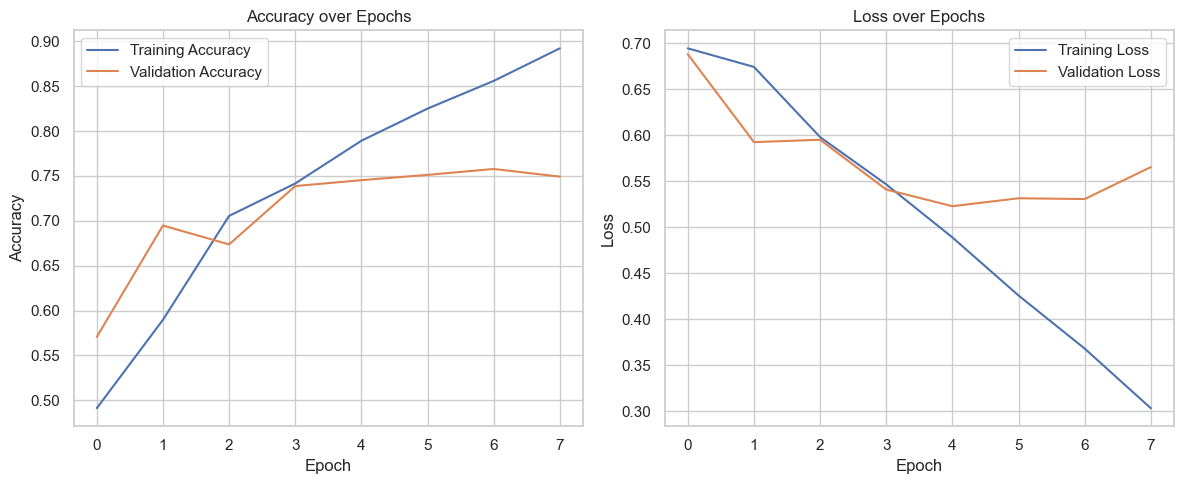

In [186]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# --- Plot Accuracy ---
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# --- Plot Loss ---
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<Figure size 2000x3000 with 0 Axes>

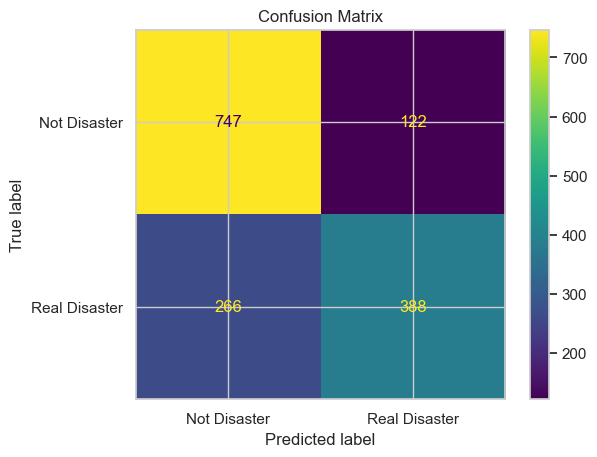

In [187]:
# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_val,y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

## GRU MODEL INCORPORATING RANDOMSEARCH FOR HYPERPARAMETR TUNING

In [180]:
!pip install keras-tuner --quiet
!pip install keras-tuner --quiet


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [118]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_gru_model(hp):
    model = Sequential()
    
    # Embedding layer
    model.add(Embedding(
        input_dim=vocab_size,
        output_dim=hp.Int('embedding_dim', 32, 128, step=32),
        input_length=maxlen
    ))

    # GRU layer
    model.add(GRU(
        units=hp.Int('gru_units', 32, 128, step=32),
        return_sequences=False
    ))

    # Dropout
    model.add(Dropout(
        rate=hp.Float('dropout', 0.1, 0.5, step=0.1)
    ))

    # Dense output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [119]:
tuner = kt.RandomSearch(
    build_gru_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='gru_tuning',
    project_name='disaster_tweet_classification'
)

In [120]:
tuner.search(
    X_train_pad, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=32,
    verbose=1
)

Trial 10 Complete [00h 02m 27s]
val_accuracy: 0.5738916397094727

Best val_accuracy So Far: 0.6707717776298523
Total elapsed time: 00h 26m 42s


In [121]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

# Final training with best config
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=32
)


Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.5703 - loss: 0.6853 - val_accuracy: 0.4819 - val_loss: 0.7159
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.5343 - loss: 0.7139 - val_accuracy: 0.5509 - val_loss: 0.6920
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.5424 - loss: 0.7029 - val_accuracy: 0.5780 - val_loss: 0.6741
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.5865 - loss: 0.6700 - val_accuracy: 0.6388 - val_loss: 0.6343
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.6709 - loss: 0.5875 - val_accuracy: 0.6995 - val_loss: 0.5829
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.7591 - loss: 0.4796 - val_accuracy: 0.7373 - val_loss: 0.5373
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.8398 - loss: 0.3627 - val_accuracy: 0.7455 - val_loss: 0.5491
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8952 - loss: 0.2715 - val_acc

In [123]:
from sklearn.metrics import f1_score, classification_report

# Predict on validation set
y_pred = model.predict(X_val_pad)
y_pred = (y_pred > 0.5).astype(int)

# F1 Score
f1 = f1_score(y_val, y_pred)
print("F1 Score on Validation Data: {:.2f}".format(f1))

# Classification Report
print("Classification Report on Validation Data:")
print(classification_report(y_val, y_pred))

# Predict on test set
predictions = model.predict(X_test_pad)
predictions = (predictions > 0.5).astype(int).reshape(-1)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
F1 Score on Validation Data: 0.68
Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       869
           1       0.71      0.65      0.68       654

    accuracy                           0.74      1523
   macro avg       0.73      0.73      0.73      1523
weighted avg       0.74      0.74      0.74      1523

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [ ]:
predictions = model.predict(X_test_pad)  

# Get binary predictions
predictions = (predictions > 0.5).astype(int).reshape(-1)

In [ ]:
from sklearn.metrics import classification_report
# Print the classification report
print(classification_report(y_val, y_pred))

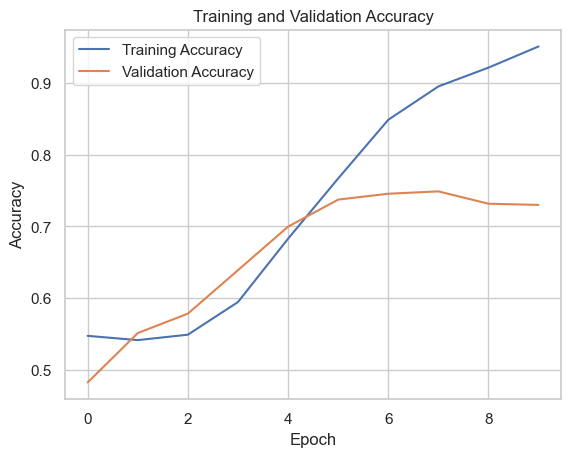

In [125]:
#Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

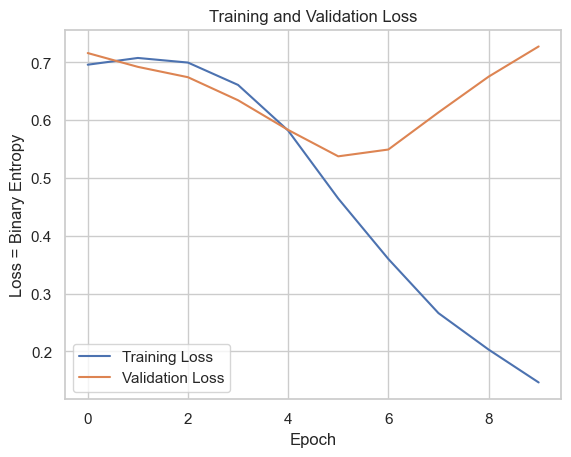

In [126]:
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epoch')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss = Binary Entropy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

<Figure size 1600x1200 with 0 Axes>

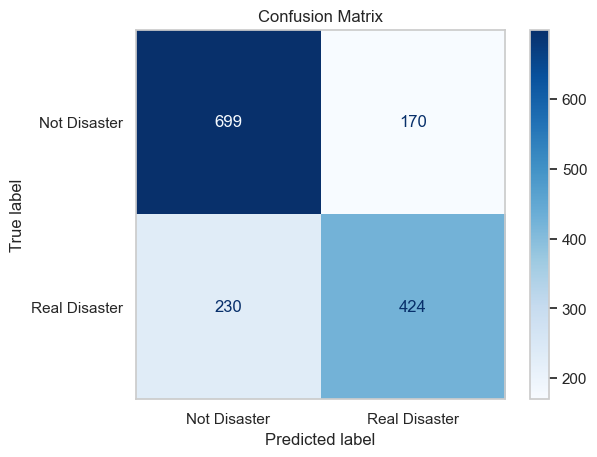

In [127]:
# Plot confusion matrix
plt.figure(dpi=200, figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, display_labels=class_names, cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [128]:
# Display some examples
for i in range(10):
    print("Example {}:".format(i + 1))
    print("Text: {}".format(test_df['text'][i]))
    print("Predicted Label: {}".format(predictions[i]))
    print("-" * 50)

Example 1:
Text: just happened a terrible car crash
Predicted Label: 0
--------------------------------------------------
Example 2:
Text: heard about earthquake is different cities stay safe everyone
Predicted Label: 1
--------------------------------------------------
Example 3:
Text: there is a forest fire at spot pond geese are fleeing across the street i cannot save them all
Predicted Label: 1
--------------------------------------------------
Example 4:
Text: apocalypse lighting spokane wildfires
Predicted Label: 1
--------------------------------------------------
Example 5:
Text: typhoon soudelor kills  in china and taiwan
Predicted Label: 1
--------------------------------------------------
Example 6:
Text: were shakingits an earthquake
Predicted Label: 0
--------------------------------------------------
Example 7:
Text: theyd probably still show more life than arsenal did yesterday eh eh
Predicted Label: 0
--------------------------------------------------
Example 8:
Text: h

### References

Vidhi1290. (2021). *Disaster Tweet Classification using LSTM* [GitHub repository]. Retrieved from https://github.com/Vidhi1290/Disaster-Tweet-Classification-using-LSTM


Di Francesco, R., & Galevska, A. (2021). *NLP Disaster Tweet Prediction* [GitHub repository]. Retrieved April 30, 2025, from https://github.com/rebeccadf/NLP-disaster-tweet-prediction

